# Military Spending Comparision of 10 Countries
Intro to Data Mining, Project 1, Mark DeLong

Data from the World Bank's Data Bank (World Development Indicators)
(Military Spending - https://data-worldbank-org.proxygw.wrlc.org/indicator/MS.MIL.XPND.CD, Military Spending as a Percent of Government Spending - https://data-worldbank-org.proxygw.wrlc.org/indicator/MS.MIL.XPND.ZS, Total Population - https://data-worldbank-org.proxygw.wrlc.org/indicator/SP.POP.TOTL, GDP - https://data-worldbank-org.proxygw.wrlc.org/indicator/NY.GDP.MKTP.CD)

I started my initial work before our 10/1 class, so raw files were unzipped and edited in Excel (removing initial/blank rows, deleting columns prior to 2010 and 2020, which was blank as data has not been collected yet, then renaming remaining year columns to use unique identifiers across files)

As a Python newby, much of the resulting code was determined through trial and error, experimenting with class and online examples to generate dataframes and visualizations that fit the desired outcomes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)

#Below, I read in the columns of data from 2014-2018 across the 4 files plus the index from the first file
mil_dollars_cut = pd.read_csv('API_MS.MIL.XPND.CD_DS2_en_csv_v2_1429482.csv', usecols = list(range(0,2)) + list(range(6,11)))
mil_percent_cut = pd.read_csv('API_MS.MIL.XPND.ZS_DS2_en_csv_v2_1432333.csv', usecols = list(range(6,11)))
gdp_cut = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_1429653.csv', usecols = list(range(6,11)))
pop_cut = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1429441.csv', usecols = list(range(6,11)))

#pull all data, merging files by row and adding columns, into a dataframe
combined_data_cut = pd.concat([mil_dollars_cut, mil_percent_cut, gdp_cut, pop_cut], axis=1)

#use Country Code to pull data from my 10 countries and the world average
mycountries = combined_data_cut[combined_data_cut['Country Code'].isin(['AUS','CHN','DEU','FRA','GBR','ITA','KOR','RUS','SAU','USA','WLD'])]

#Create additional columns of per person military spending, pp GDP, change in spending by dollar and percent
mycountries["2014 pp mil_spend"] = mycountries["2014 med"] / mycountries["2014 pop"]
mycountries["2015 pp mil_spend"] = mycountries["2015 med"] / mycountries["2015 pop"]
mycountries["2016 pp mil_spend"] = mycountries["2016 med"] / mycountries["2016 pop"]
mycountries["2017 pp mil_spend"] = mycountries["2017 med"] / mycountries["2017 pop"]
mycountries["2018 pp mil_spend"] = mycountries["2018 med"] / mycountries["2018 pop"]

mycountries["2014 pp gdp"] = mycountries["2014 gdp"] / mycountries["2014 pop"]
mycountries["2015 pp gdp"] = mycountries["2015 gdp"] / mycountries["2015 pop"]
mycountries["2016 pp gdp"] = mycountries["2016 gdp"] / mycountries["2016 pop"]
mycountries["2017 pp gdp"] = mycountries["2017 gdp"] / mycountries["2017 pop"]
mycountries["2018 pp gdp"] = mycountries["2018 gdp"] / mycountries["2018 pop"]

mycountries["Delta_spend"] = mycountries["2018 med"] - mycountries["2014 med"]
mycountries["Delta_spend_percent"] = (mycountries["2018 med"] / mycountries["2014 med"]) -1

#If we wanted to export to Excel: mycountries.to_excel('my_country_data.xlsx', index=False)

In [2]:
#One dataframe with world totals or averages for relevant comparisons
mycountries_withworld = mycountries.copy()
mc_world = mycountries_withworld.set_index(['Country Name']).sort_index()
mc_world.drop('Country Code', axis=1, inplace=True)

#A second dataframe with just my 10 countries
mycountries = mycountries[mycountries['Country Code'].isin(['AUS','CHN','DEU','FRA','GBR','ITA','KOR','RUS','SAU','USA'])]
mc_indexed = mycountries.set_index(['Country Name']).sort_index()
mc_indexed.drop('Country Code', axis=1, inplace=True)
mc_indexed

,2014 med,2015 med,2016 med,2017 med,2018 med,2014 mep,2015 mep,2016 mep,2017 mep,2018 mep,...,2016 pp mil_spend,2017 pp mil_spend,2018 pp mil_spend,2014 pp gdp,2015 pp gdp,2016 pp gdp,2017 pp gdp,2018 pp gdp,Delta_spend,Delta_spend_percent
Country Name,,,,,,,,,,,,,,,,,,,,,
Australia,2.58e+10,2.40e+10,2.64e+10,2.77e+10,2.67e+10,4.81,5.22,5.58,5.48,5.12,...,1090.61,1125.57,1069.21,62510.63,56755.55,49971.26,54066.64,57395.75,9.28e+08,3.60e-02
China,2.01e+11,2.14e+11,2.16e+11,2.28e+11,2.50e+11,6.58,6.09,6.03,5.88,5.49,...,156.70,164.33,179.50,7678.61,8066.98,8147.95,8879.43,9976.66,4.92e+10,2.45e-01
France,6.36e+10,5.53e+10,5.74e+10,6.04e+10,6.38e+10,3.90,4.00,4.11,4.16,4.10,...,859.64,903.58,952.72,43011.33,36638.22,37037.44,38812.15,41631.03,1.86e+08,2.93e-03
Germany,4.61e+10,3.98e+10,4.16e+10,4.54e+10,4.95e+10,2.69,2.69,2.71,2.81,2.82,...,504.92,549.04,596.71,47959.99,41139.54,42098.92,44349.54,47639.02,3.37e+09,7.31e-02
Italy,2.77e+10,2.22e+10,2.50e+10,2.64e+10,2.78e+10,2.53,2.41,2.73,2.80,2.77,...,412.90,436.89,460.22,35518.35,30230.24,30939.76,32406.78,34520.01,1.06e+08,3.84e-03
"Korea, Rep.",3.76e+10,3.66e+10,3.69e+10,3.92e+10,4.31e+10,12.80,12.64,12.62,12.33,12.35,...,720.17,762.64,834.58,29249.61,28732.17,29288.84,31616.81,33340.29,5.52e+09,1.47e-01
Russian Federation,8.47e+10,6.64e+10,6.92e+10,6.65e+10,6.14e+10,11.77,13.81,14.83,12.13,11.40,...,479.73,460.41,424.89,14318.21,9462.25,8845.56,10894.36,11555.96,-2.33e+10,-2.75e-01
Saudi Arabia,8.08e+10,8.72e+10,6.37e+10,7.04e+10,6.76e+10,26.55,32.65,25.52,30.70,24.59,...,1962.63,2126.94,2004.59,24463.89,20627.94,19879.31,20803.74,23338.97,-1.32e+10,-1.64e-01
United Kingdom,5.92e+10,5.39e+10,4.81e+10,4.64e+10,5.00e+10,4.81,4.69,4.66,4.60,4.62,...,733.39,702.91,752.29,47425.56,44974.82,41064.08,40361.43,43043.26,-9.19e+09,-1.55e-01


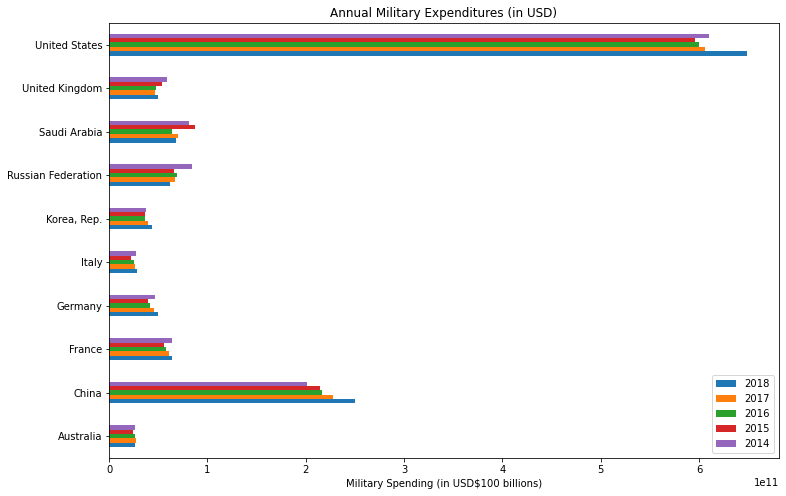

In [3]:
#Military Spending (in dollars)
mil_spend = mc_indexed.loc[:, ['2018 med','2017 med','2016 med','2015 med','2014 med']]
mil_spend.columns = ['2018', '2017', '2016', '2015', '2014']
mil_spend.plot(kind='barh',figsize=(12,8))
plt.title('Annual Military Expenditures (in USD)')
plt.ylabel('')
plt.xlabel('Military Spending (in USD$100 billions)')
plt.show()

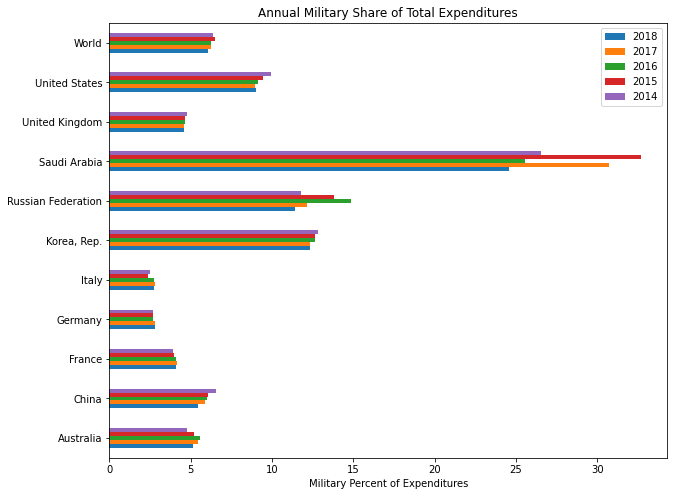

In [4]:
#Military Spending as Percent of Budget, with World average
mil_per = mc_world.loc[:, ['2018 mep','2017 mep','2016 mep','2015 mep','2014 mep']]
mil_per.columns = ['2018', '2017', '2016', '2015', '2014']
mil_per.plot(kind='barh',figsize=(10,8))
plt.title('Annual Military Share of Total Expenditures')
plt.ylabel('')
plt.xlabel('Military Percent of Expenditures')
plt.show()

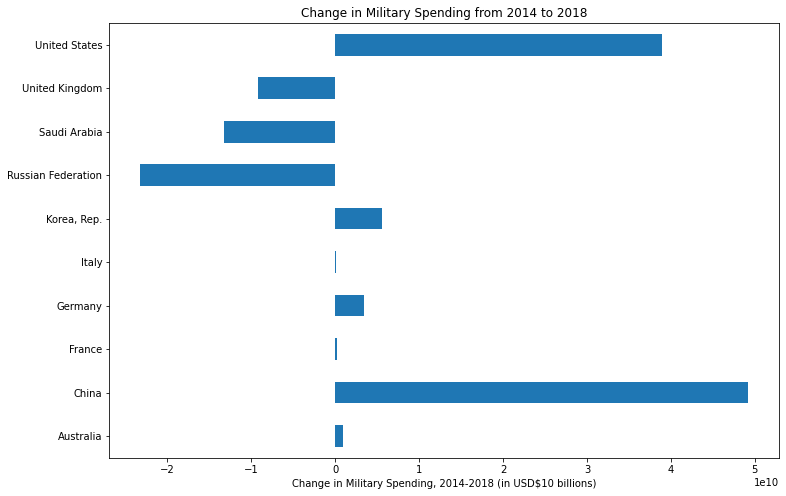

In [5]:
#Change in Military Spending (in dollars)
desp = mc_indexed.loc[:, ['Delta_spend']]
desp.plot(kind='barh',figsize=(12,8), legend=None)
plt.title('Change in Military Spending from 2014 to 2018')
plt.ylabel('')
plt.xlabel('Change in Military Spending, 2014-2018 (in USD$10 billions)')
plt.show()

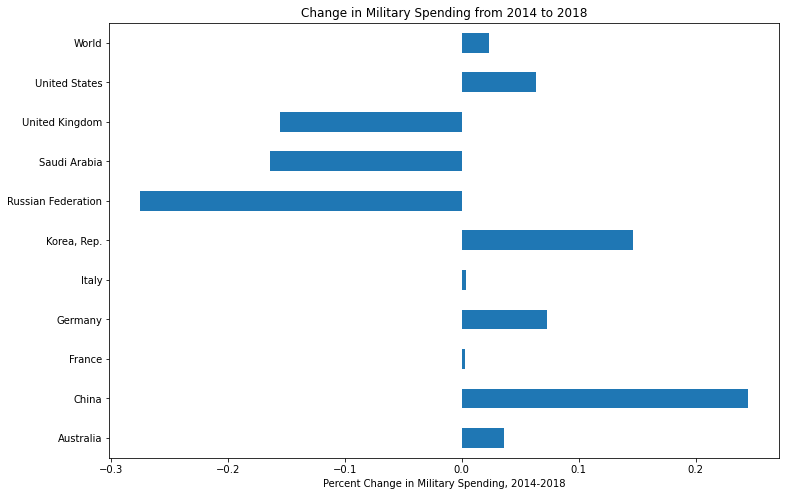

In [6]:
#Change in Military Spending (percent), with World average
depe = mc_world.loc[:, ['Delta_spend_percent']]
depe.plot(kind='barh',figsize=(12,8), legend=None)
plt.title('Change in Military Spending from 2014 to 2018')
plt.ylabel('')
plt.xlabel('Percent Change in Military Spending, 2014-2018')
plt.show()

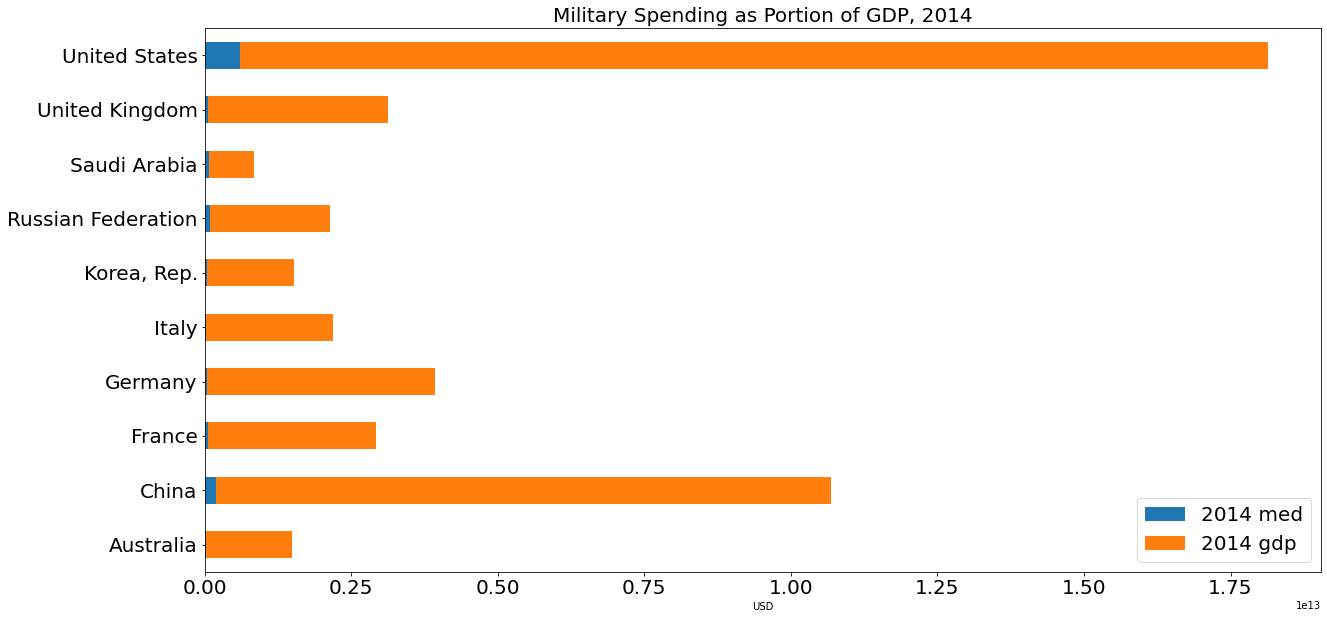

In [7]:
#Military spending compared to GDP (absolute), with world average

def plot_spendingandgdp(df, limit=10):
    df = mc_indexed.loc[:, ['2014 med', '2014 gdp']][:limit]
    df.plot(kind='barh', stacked=True, sort_columns=True, figsize=(20,10), fontsize=20)
    plt.title('Military Spending as Portion of GDP, 2014', fontsize=20)
    plt.legend(fontsize=20, loc='best')
    plt.ylabel('')
    plt.xlabel('USD')
    plt.show()

plot_spendingandgdp(mc_indexed, 10)

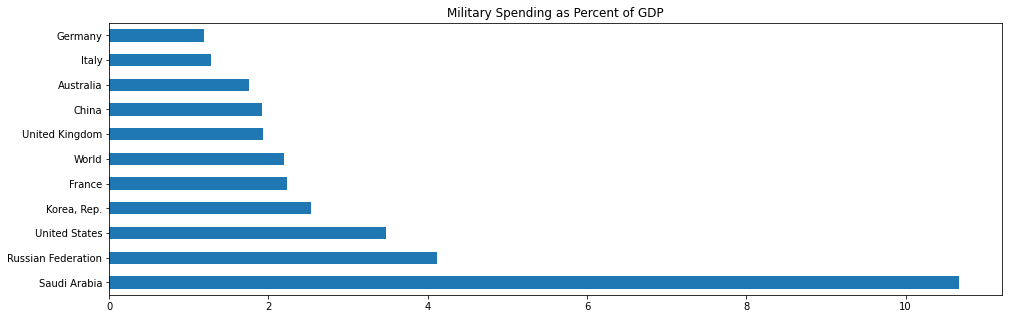

In [8]:
#better way to show MS:GDP might be as a percent (MS/GDP)
df1 = mc_world.loc[:, ['2014 gdp', '2014 med']]
df1['MS_by_GDP'] = (df1['2014 med'] / df1['2014 gdp'])*100
del df1['2014 gdp']
del df1['2014 med']
df1 = df1.sort_values(by='MS_by_GDP', axis=0, ascending=False)

df1.plot(kind='barh', figsize=(16,5), title='Military Spending as Percent of GDP', legend=None)
plt.ylabel('')
plt.show()

In [9]:
#Compare per person military spending to per person GDP (absolute and percentage)

ppmil_gdp = mc_world.sort_values(by='2018 pp mil_spend', ascending=False)
ppmil_gdp.drop('2014 med', axis=1, inplace=True)
ppmil_gdp.drop('2015 med', axis=1, inplace=True)
ppmil_gdp.drop('2016 med', axis=1, inplace=True)
ppmil_gdp.drop('2017 med', axis=1, inplace=True)
ppmil_gdp.drop('2018 med', axis=1, inplace=True)
ppmil_gdp.drop('2014 mep', axis=1, inplace=True)
ppmil_gdp.drop('2015 mep', axis=1, inplace=True)
ppmil_gdp.drop('2016 mep', axis=1, inplace=True)
ppmil_gdp.drop('2017 mep', axis=1, inplace=True)
ppmil_gdp.drop('2018 mep', axis=1, inplace=True)
ppmil_gdp.drop('2014 gdp', axis=1, inplace=True)
ppmil_gdp.drop('2015 gdp', axis=1, inplace=True)
ppmil_gdp.drop('2016 gdp', axis=1, inplace=True)
ppmil_gdp.drop('2017 gdp', axis=1, inplace=True)
ppmil_gdp.drop('2018 gdp', axis=1, inplace=True)
ppmil_gdp.drop('2014 pop', axis=1, inplace=True)
ppmil_gdp.drop('2015 pop', axis=1, inplace=True)
ppmil_gdp.drop('2016 pop', axis=1, inplace=True)
ppmil_gdp.drop('2017 pop', axis=1, inplace=True)
ppmil_gdp.drop('2018 pop', axis=1, inplace=True)

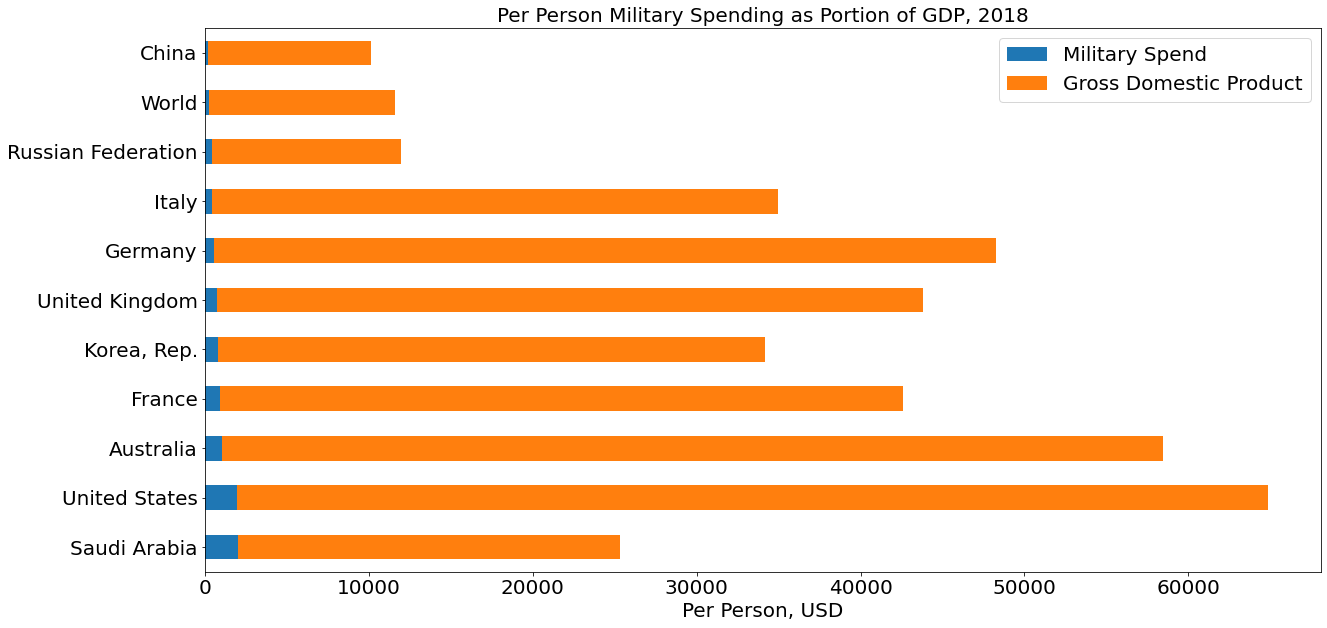

In [10]:
#Per Person Military Spending as Portion of Per Person GDP
def plot_ppspendingandgdp(df, limit=11):
    df = ppmil_gdp.loc[:, ['2018 pp mil_spend', '2018 pp gdp']][:limit]
    df.columns = ['Military Spend', 'Gross Domestic Product']
    df.plot(kind='barh', stacked=True, sort_columns=True, figsize=(20,10), fontsize=20)
    plt.legend(fontsize=20)
    plt.ylabel('')
    plt.xlabel('Per Person, USD', fontsize=20)
    plt.title('Per Person Military Spending as Portion of GDP, 2018', fontsize=20)
    plt.show()

plot_ppspendingandgdp(ppmil_gdp, 11)

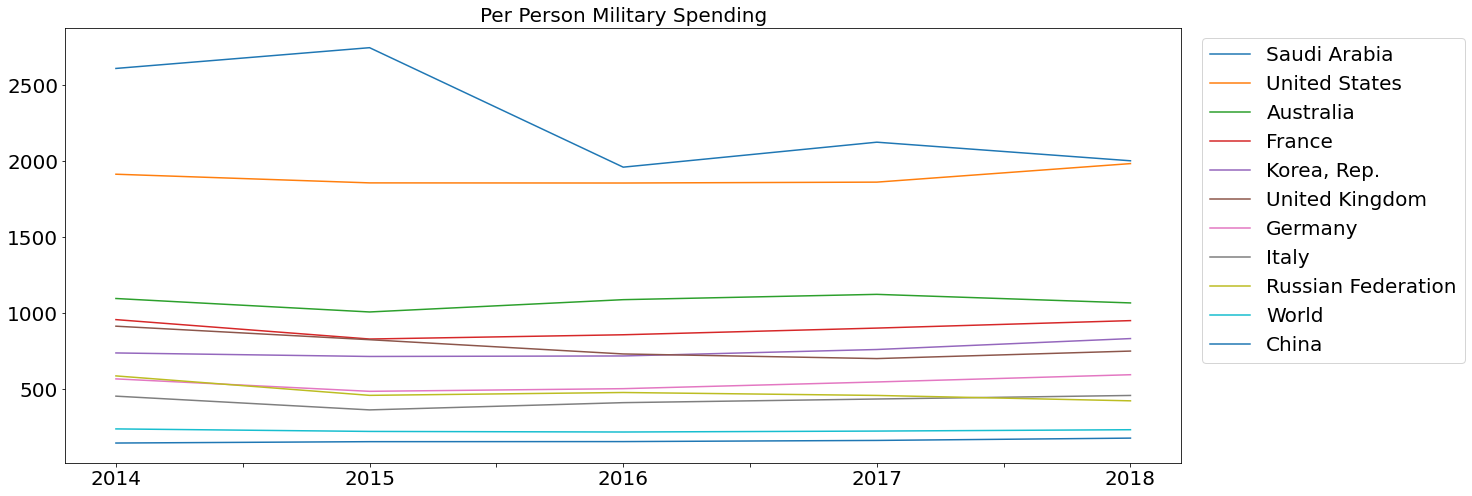

In [11]:
#Per Person Military Spending
ppmil = ppmil_gdp.copy()
ppmil.drop('2014 pp gdp', axis=1, inplace=True)
ppmil.drop('2015 pp gdp', axis=1, inplace=True)
ppmil.drop('2016 pp gdp', axis=1, inplace=True)
ppmil.drop('2017 pp gdp', axis=1, inplace=True)
ppmil.drop('2018 pp gdp', axis=1, inplace=True)
ppmil.drop('Delta_spend', axis=1, inplace=True)
ppmil.drop('Delta_spend_percent', axis=1, inplace=True)
ppmil.columns = ['2014', '2015', '2016', '2017', '2018']
ppmil = ppmil.T #transpose columns & rows for better presentation

ppmil.plot(figsize=(20, 8), fontsize=20)
plt.title('Per Person Military Spending', fontsize=20)
plt.legend(loc='best', fontsize=20, bbox_to_anchor=(1.01, 1))
plt.show()

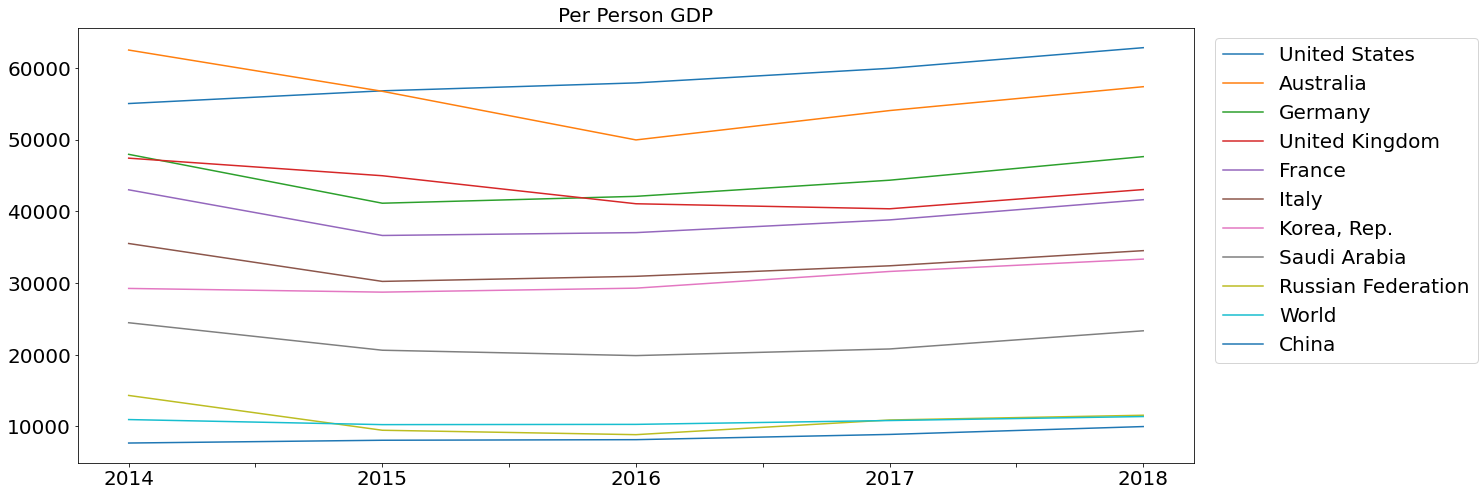

In [12]:
#Per Person GDP
ppgdp = ppmil_gdp.copy().sort_values(by='2018 pp gdp', ascending=False)
ppgdp.drop('2014 pp mil_spend', axis=1, inplace=True)
ppgdp.drop('2015 pp mil_spend', axis=1, inplace=True)
ppgdp.drop('2016 pp mil_spend', axis=1, inplace=True)
ppgdp.drop('2017 pp mil_spend', axis=1, inplace=True)
ppgdp.drop('2018 pp mil_spend', axis=1, inplace=True)
ppgdp.drop('Delta_spend', axis=1, inplace=True)
ppgdp.drop('Delta_spend_percent', axis=1, inplace=True)
ppgdp.columns = ['2014', '2015', '2016', '2017', '2018']
ppgdp = ppgdp.T

ppgdp.plot(figsize=(20, 8), fontsize=20)
plt.title('Per Person GDP', fontsize=20)
plt.legend(loc='best', fontsize=20, bbox_to_anchor=(1.01, 1))
plt.show()

# Conclusions

There are many ways to analyze the military spending of countries. Just looking at one method without context may be misleading (e.g., the overall amount spent can seem dramatic, but looking at it as a percentage of government expenditure or on a per-capita basis may bring improved perspective). Another method could be to examine military spending based on the area of a country - does a larger area require a larger military expenditure?

This was also a useful exercise to learn how to adjust large datasets within Python, using pandas and dataframes, and learning how to visually represent the data in a variety of formats.